# Nanodegree Engenheiro de Machine Learning
## Unsupervised Learning
## Project 3: Creating Customer Segments

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [41]:
# Importe as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames


# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
import matplotlib.pyplot as plt
%matplotlib inline

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Observando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'**. Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [42]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [43]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = [50 , 421 , 222]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6269,1095,1980,3860,609,2162
1,17063,4847,9053,1031,3415,1784
2,5041,1115,2856,7496,256,375


### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
*Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?*  
**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:**

Antes de separamos os tipos de estabelecimentos, se faz necessário entender o que seria cada atributo e a quais produtos eles representam. Sendo assim, ao pesquisar em alguns fóruns (https://discussions.udacity.com/t/project-3-lots-of-guesswork/174839/2) uma lista bastante explicativa é dada a partir de dúvidas de outros alunos a respeito dessas categorias:


**'Fresh'** : Vegetables, fruits, greens; things you'd most likely find at a farmer's market of sorts.

**'Deli'** : Delicatessen; although the word is more modernized now, I would suspect products like meats, cheeses, and sweets would fall in this category

**'Milk'** : Perhaps this can be more general as in dairy, but this one seems fairly straight-forward

**'Grocery'** : If we exclude the other three product classes above from groceries, then most other food items would be from this product class. Examples like cereals, snack foods, etc.

**'Detergents_Paper'** : This would most likely include paper products and cleaning products. I'd suspect it could include office products, but more than likely it means things like toiletries and products like bleach, soaps, cleaners, etc.

**'Frozen'** : Foods that have been prepared and frozen, or things that are typically left on ice. I'd imagine ice cream would be a product of this, as would be things like prepared meals, frozen meats and vegetables, etc.

***Estabelecimento 01 -   *** O primeiro estabelecimento pode ser considerado um *"Pequeno mercado"* ou um *"Mercado de bairro"*. Ao analisarmos os produtos adquiridos e os valores envolvidos, observamos que a parte de Delicatessen tem um valor acima da média. Isso pode evidenciar um local com produtos "gourmetizados" mas pequeno devido ao consumo dos outros atributos.

***Estabelecimento 02 -   *** Já o segundo estabelecimento possui um consumo de alimentos frescos, alimentos embalados (grocery), produtos de higiene e delicatessen acima da média dos dados observados. Logo, pode-se inferir a priori que se trata de um *"Supermercado"*. Mesmo com o consumo de derivados do leite e congelados abaixo da média, o perfil de consumo dos outros produtos leva a uma consideração de um mercado de tamanho relevante.

***Estabelecimento 03 -   *** Por fim, o terceiro estabelecimento apresenta um comportamento semelhante à um pequeno mercado. Contudo, o atributo de "congelados" chama atenção por ser acima da média. Logo, pode-se pensar que esse estabelecimento se trata de um restaurante especializado em carnes ou mesmo um restaurante que utiliza bastante comida congelada em seus pratos como lasanhas pré prontas, batatas fritas congeladas, sobremesas pré preparadas e até mesmo frutas congeladas.

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [44]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado

#Labels dos features a testar = 'Detergents_Paper' ,'Fresh','Milk','Grocery','Frozen','Delicatessen']
label_array = data['Grocery']
new_data = data.drop(['Grocery'],axis = 1)

# TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
X_train, X_test, y_train, y_test = train_test_split(new_data, label_array, test_size=0.25, random_state=49)

# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
regressor = DecisionTreeRegressor(random_state=49)
regressor.fit(X_train, y_train)

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
score = regressor.score(X_test, y_test)
print "Pontuação:",score
print('\n')
print "Pontuação do label 'Detergents_Paper' é: 0.432656679705:"
print('\n')
print "Pontuação do label 'Fresh' é: -0.150104549907:"
print('\n')
print "Pontuação do label 'Milk' é: 0.299791961884:"
print('\n')
print "Pontuação do label 'Grocery' é: 0.818311166383:"
print('\n')
print "Pontuação do label 'Frozen' é: -0.579866309538:"
print('\n')
print "Pontuação do label 'Delicatessen' é: -0.579866309538:"

Pontuação: 0.818311166383


Pontuação do label 'Detergents_Paper' é: 0.432656679705:


Pontuação do label 'Fresh' é: -0.150104549907:


Pontuação do label 'Milk' é: 0.299791961884:


Pontuação do label 'Grocery' é: 0.818311166383:


Pontuação do label 'Frozen' é: -0.579866309538:


Pontuação do label 'Delicatessen' é: -0.579866309538:


### Questão 2
*Qual atributo você tentou prever? Qual foi a pontuação da previsão reportada? Esse atributo é necessário para identificar os hábitos de compra dos clientes?*  
**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados.

**Resposta:**

Com o intuito de entender como cada atributo está relacionado com os demais, fiz a previsão para todos eles. Com isso, cheguei a conclusão que o atributo **'Grocery'** apresenta o maior *score*. Isso significa que esse atributo não é interamente relevante para a identificação de hábitos dos clientes.

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

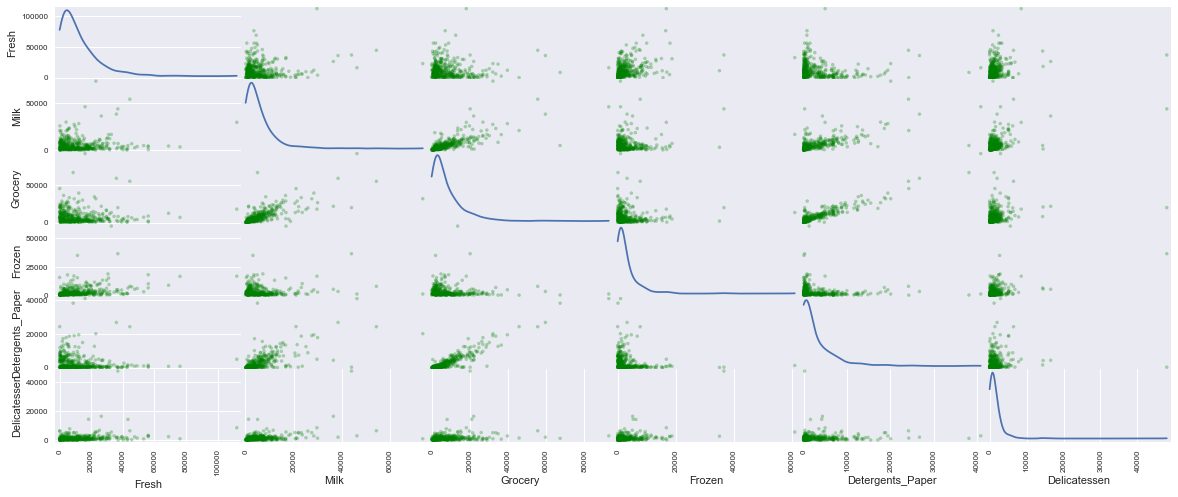

In [45]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (20,8), diagonal = 'kde', color='green');


plt.savefig('Matrix de dispersão para data.png', format='png', dpi=1000)

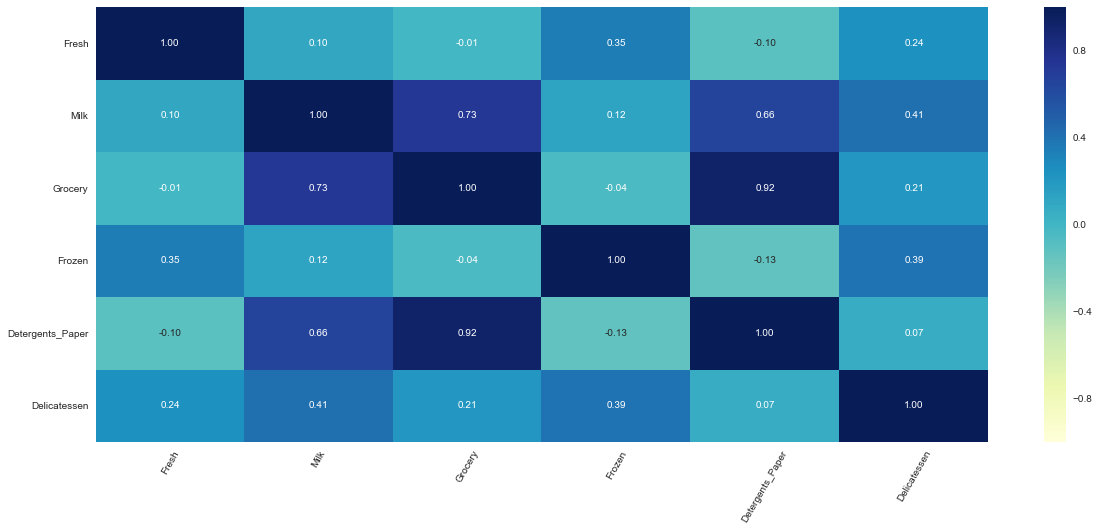

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, fmt = ".2f",cbar = True , cmap="YlGnBu")

plt.xticks(rotation=60)
plt.yticks(rotation = 0)

plt.savefig('Correlação do dataset.png', format='png', dpi=1000)

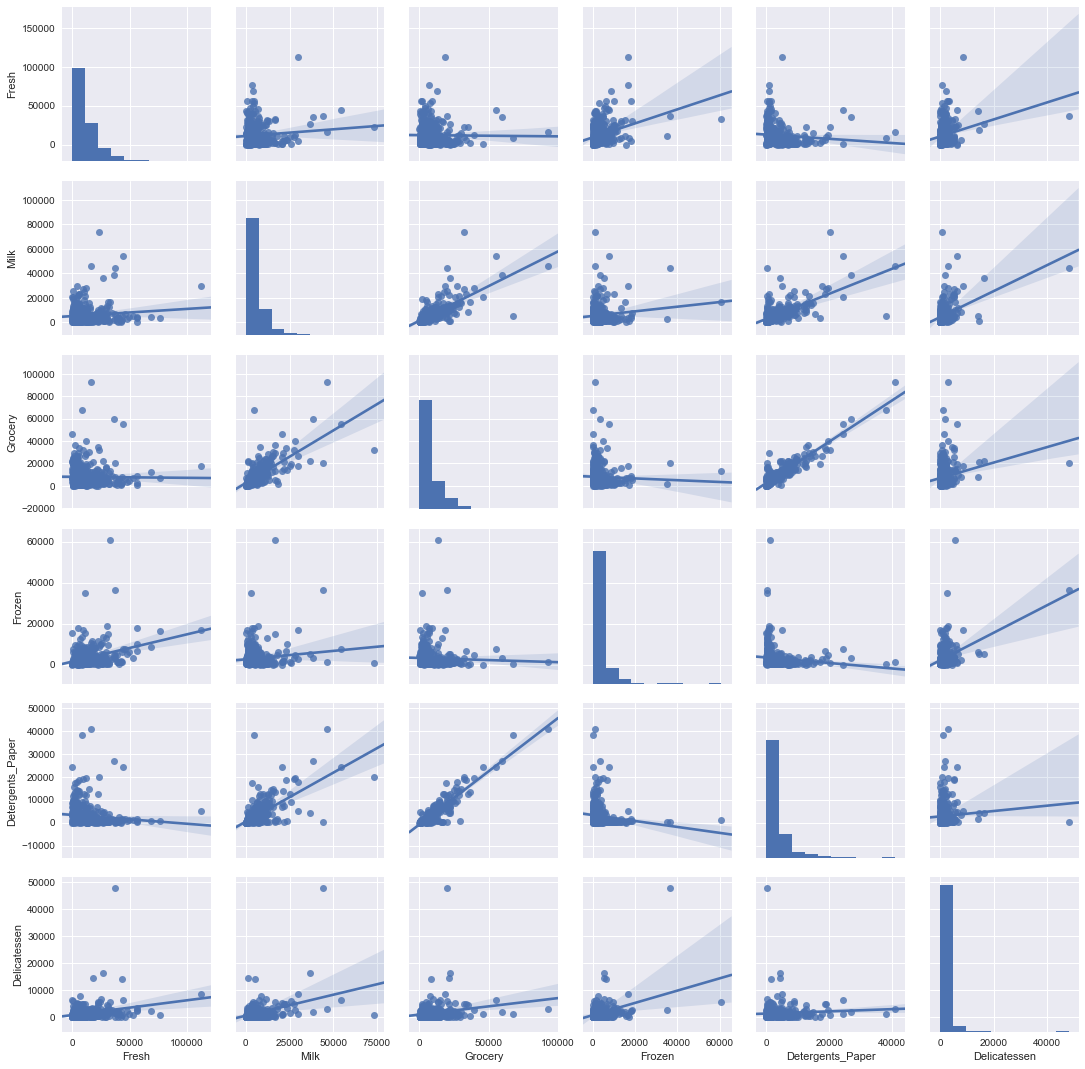

In [47]:
sns.pairplot(data,kind="reg")

plt.savefig('Verificando os dados.png', format='png', dpi=1000)

### Questão 3
*Há algum par de atributos que mostra algum grau de correlação? Isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever? Como os dados desses atributos são distribuídos?*  
**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos de dados está? 

**Resposta:**

Alguns atributos apresentam correlação e, aparentemente, linear. Podemos citar 'Milk' e 'Grocery', 'Detergents_Paper' e 'Grocery'. Essa observação corrobora a suspeita de que o *Label* 'Grocery' pode ser representado por um modelo, talvez linear, de outros atributos.

Para uma melhor observação da correlação entre os atributos, pode-se observar pelo mapa de correlação acima que os atributos citados de fato apresentam correlação:

'Milk' e 'Grocery' : **0,73**

'Detergents_Paper' e 'Grocery': **0,92**

Além do par 'Milk' e 'Detergents_Paper' que não fora observado pelo *scatter plot* da primeira figura:

'Milk' e 'Detergents_Paper': **0,66**

Pelos dados apresentados nos gráficos de *scatter plot*, a maioria dos atributos apresentam uma posição próxima à origem de cada gráfico, com exceção dos atributos que aparentemente se correlacionam.

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

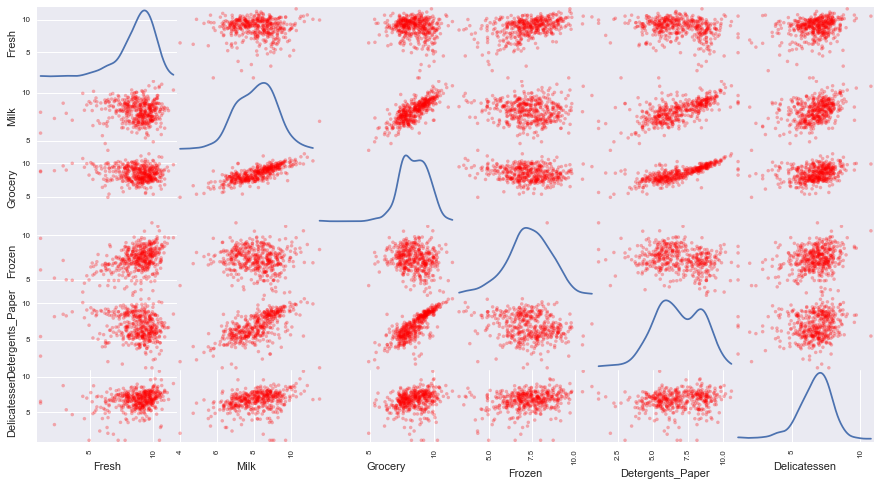

In [48]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = np.log(data)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = np.log(samples)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (15,8), diagonal = 'kde', color='red');

plt.savefig('Matrix de dispersão-log_data.png', format='png', dpi=1000)

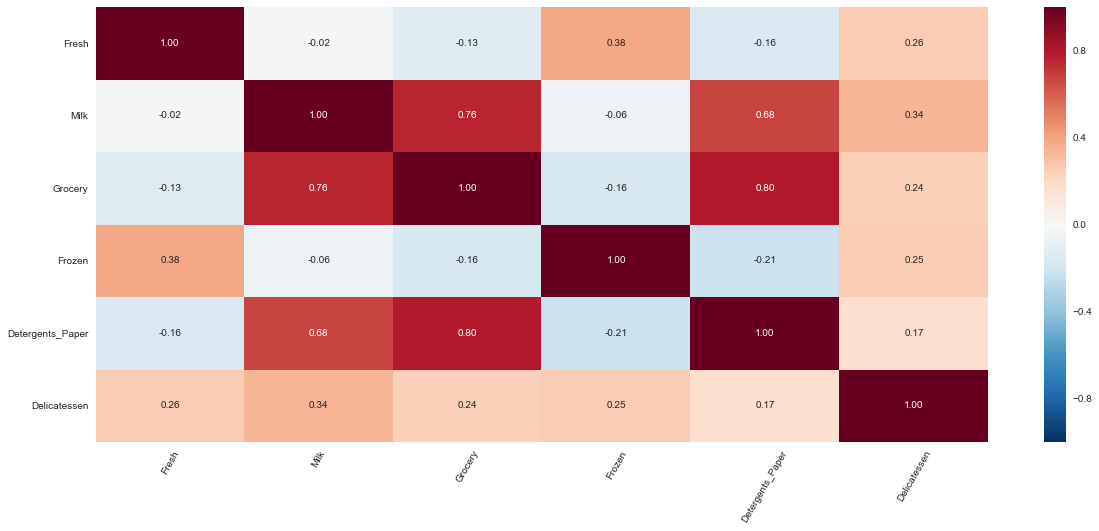

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.heatmap(log_data.corr(), annot=True, fmt = ".2f",cbar = True)

plt.xticks(rotation=60)
plt.yticks(rotation = 0)

plt.savefig('creating_customer_segments.png', format='png', dpi=1000)

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [50]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
1,9.744668,8.486115,9.110851,6.938284,8.135933,7.486613
2,8.525360,7.016610,7.957177,8.922125,5.545177,5.926926


### Implementação: Detecção de Discrepantes
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [51]:
# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos


all_outliers = np.array([], dtype='int64')

for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = (Q3 - Q1) * 1.5
    
    # Mostre os discrepantes
    print "Pontos no dataset considerados Outliers para o atributo '{}':".format(feature)
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, outlier_points.index.values.astype('int64'))
    # Display the outliers
    display(outlier_points)
    
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>1]

print outliers

# Remova os discrepantes, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Número de Outliers: ", len(outliers)
print "O novo dataset com os Outliers removidos possuem {} linhas {} atributos.".format(*good_data.shape)

Pontos no dataset considerados Outliers para o atributo 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Pontos no dataset considerados Outliers para o atributo 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Pontos no dataset considerados Outliers para o atributo 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Pontos no dataset considerados Outliers para o atributo 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Pontos no dataset considerados Outliers para o atributo 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Pontos no dataset considerados Outliers para o atributo 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[ 65  66  75 128 154]
Número de Outliers:  5
O novo dataset com os Outliers removidos possuem 435 linhas 6 atributos.


### Questão 4
*Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima? Esses pontos de dados deveriam ser removidos do conjunto? Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.* 

**Resposta:**

Alguns pontos foram considerados discrepantes para mais de um atributo:

**65:** Ponto discrepante para os atributos 'Frozen' and 'Fresh'.

**66:** Ponto discrepante para os atributos 'Delicatessen' and 'Fresh'.

**75:** Ponto discrepante para os atributos 'Detergents_Paper' and 'Grocery'.

**128:** Ponto discrepante para os atributos 'Delicatessen' and 'Fresh'.

**154:** Ponto discrepante para os atributos 'Milk' and 'Grocery'.

Esses pontos devem ser removidos do conjunto, pois eles podem enviesar os modelos. Além disso, por serem *outliers*, não representam o restante dos dados para os atributos e não agregam na análise.

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]
6


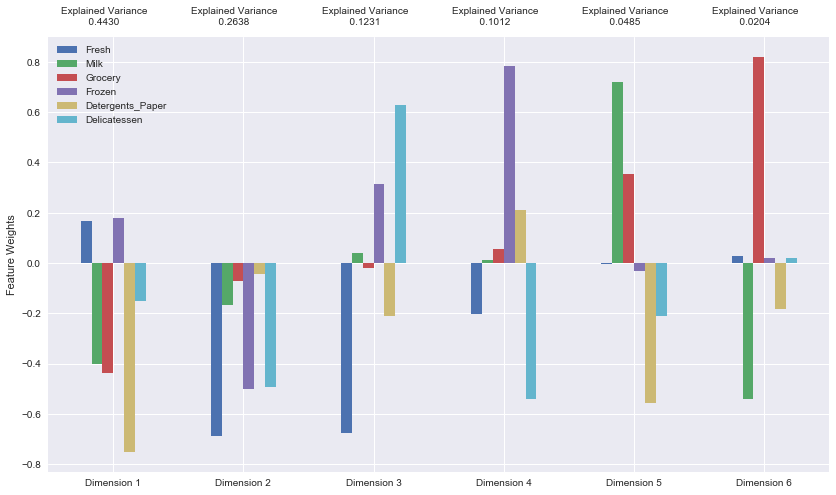

In [78]:
from sklearn.decomposition import PCA

# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=6 , random_state = 99) 
pca.fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_results = rs.pca_results(good_data, pca)

plt.savefig('PCA resultado para good_data.png', format='png', dpi=100)

print (pca.explained_variance_ratio_)
print (pca.n_components_)

### Questão 5
*Quanta variância nos dados é explicado * ***no total*** * pelo primeiro e segundo principal componente? E os quatro primeiros principais componentes? Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões melhor representa em termos de despesas dos clientes.*  
**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:**

*Variância nos dados para primeiro e segundo PCA*

**1ª Componente Principal: ** 44,3%

**2ª Componente Principal: ** 26,4%

**Total: ** 70,7%



*Variância nos dados para os quatro primeiros principais*


**3ª Componente Principal: ** 12,3%

**4ª Componente Principal: ** 10,1%

**Total Parcial: ** 22,4%

**Variânica Total: ** 93,1%

*Representatividade dos dados em relação às despesas dos clientes

**1ª Dimensão: ** Pode-se observar que para a primeira *Dimensão* os atributos que são melhores representados são *'Fresh'* e *'Frozen'*. Em contrapartida, apresenta uma queda de no *information gain* para os outros atribubos de forma considerável. Esse perfil de consumidor pode representar bem um supermercado dedicado a congelados ou açougue.

**2ª Dimensão: ** A segunda *Dimensão* apresenta uma perda acentuada de informação para *'Fresh'*, *'Frozen'* e *'Delicatessen'*. Pela tendência de avaliação do *information gain* e por apresentar baixa perda para *'Detergents_Paper'* e *'Grocery'*, acredito que esse perfil tenha uma preferência por esses dois últimos atributos, mesmo tendo essa leve queda. O que me leva a pensar em um pequeno supermercado local em que apenas esses dois atributos tem um consumo expressivo.

**3ª Dimensão: ** *'Frozen'* e *'Delicatessen'* apresentam nessa *Dimensão* um ganho de informação relevante para a descrição dos clientes. Ainda com um pequeno ganho para *'Milk'*, mesmo com *information loss* para *'Fresh'* e *'Detergents_Paper'* pode-se supor uma pequena loja de conveniência para consumo rápido ou pequenos produtos para o consumo.

**4ª Dimensão: ** *'Frozen'* e *'Detergents_Paper'* são os que obtiveram uma melhora no ganho de informação para a 4ª *Dimensão* enquanto *'Delicatessen'* e *'Fresh'* perderam informação nesse caso. Contudo, podemos observar que *'Frozen'* é o que apresenta maior ganho de informação. Com isso, acredito que esse consumidor seja um açougue ou peixaria em que o consumo de itens congelados seja o *core* do negócio.

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [53]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1404,-0.6710,0.9823,0.0603,-1.1423,0.0055
1,-1.4571,-1.0316,-0.5676,-0.6119,-0.4132,0.1330
2,1.9682,0.0198,0.4150,1.4152,-0.1703,0.4271


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

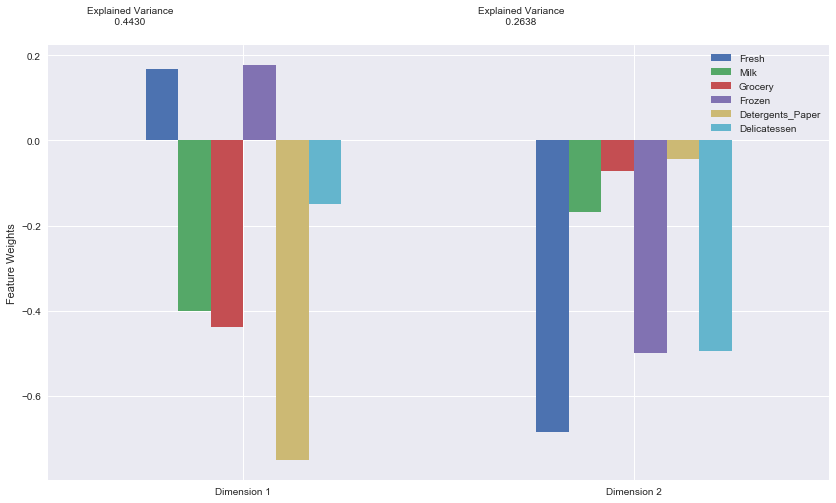

In [72]:
from sklearn.decomposition import PCA

# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=2).fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

pca_results = rs.pca_results(good_data, pca)

plt.savefig('PCA resultado as duas dimensões.png', format='png', dpi=100)

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [55]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.1404,-0.6710
1,-1.4571,-1.0316
2,1.9682,0.0198


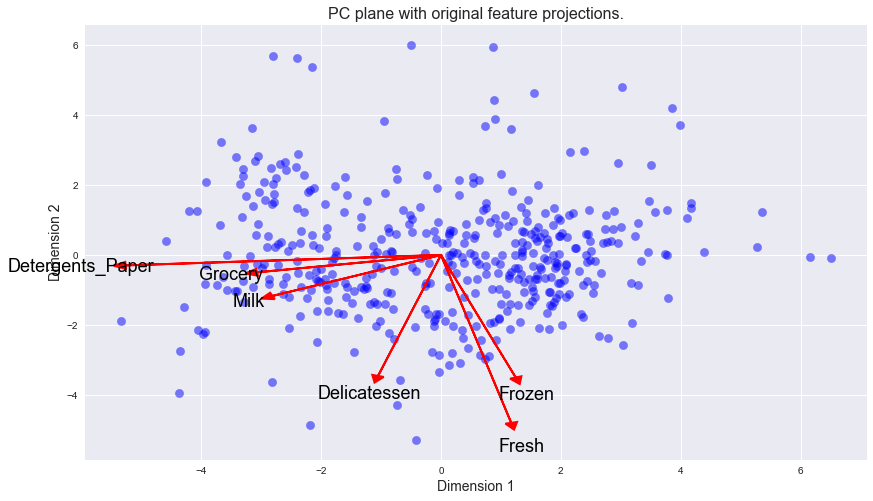

In [73]:
#Código de visualização
import visuals as vs


# Create a biplot
vs.biplot(good_data, reduced_data, pca)

plt.savefig('Scatterplot dos dados e os atributos.png', format='png', dpi=100)

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
*Quais são as vantagens de utilizar o algoritmo de clustering K-Means? Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano? Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.*

**Resposta:**

**K-Means**

*K-Means* apresenta as seguintes vantagens:

    - Facil de ser implementado e perfeitamente legível por leigos;
    - Com um número grande de atributos, *K-Means* tende a ser mais eficiente do que classificações hierárquicas;
    - Uma instacia é automaticamente classificado ao mudar o posicionamento do centróide.
    
Contudo, *K-Means* apresenta as seguintes desvantagens:

    - Difícil prever o número de *cluster*;
    - Posição inicial dos centróides influenciam os resultados;
    - Sensitiva a escala dos dados;
    - *Outliers* podem afetar os resultados.
    - Ele apresenta um *hard assignment*, que a cada iteração do algoritmo o ponto a ser classificado é associadoa apenas um cluster.
    
    
**Modelo de Mistura Gaussiano**

O *Modelo de Mistura Gaussiano* apresenta como vantagens:

    - É o algoritmo mais rápido para se aprender *mixture models*;
    - Maximiza a probabilidade;
    - Permite que um ponto possa pertencer a dois grupos.
    - Apresenta *soft assignment* o que nos dá uma certa liberdade com os pontos e não termos uma classificação booleana (pertece/não pertece). Assim, podemos ter uma assertividade melhor no nosso modelo.

Ainda sim, *Modelo de Mistura Gaussiano* apresenta como desvantagens:

    - Pode convergir para um ótimo local dependendo das condições iniciais;
    - É um modelo mais complicado de se interpretar.
    
    
    
A partir das informações, eu utilizaria o **K-Means** devido ao limitado número de atributos e ainda ao meu pouco conhecimento dos dados. O algoritmo escolhido é mais genérico e pode ser uma boa 'tacada' inicial para o problema.

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [57]:
#Criando um 'range' de classificação para os algoritmos
range_classificacao = list(range(2,11))
print(range_classificacao)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [58]:
# Utilizando o algoritmo K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

for n_classificacao in range_classificacao:
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer = KMeans(n_clusters = n_classificacao, random_state=89).fit(reduced_data)

    # TODO: Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centers = clusterer.cluster_centers_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score(reduced_data, preds)
    print "For n_classificacao = {}. A média da pontuação 'silhouette_score' é : {}".format(n_classificacao, score)

For n_classificacao = 2. A média da pontuação 'silhouette_score' é : 0.426281015469
For n_classificacao = 3. A média da pontuação 'silhouette_score' é : 0.394187354045
For n_classificacao = 4. A média da pontuação 'silhouette_score' é : 0.331245916061
For n_classificacao = 5. A média da pontuação 'silhouette_score' é : 0.353692986227
For n_classificacao = 6. A média da pontuação 'silhouette_score' é : 0.365150153115
For n_classificacao = 7. A média da pontuação 'silhouette_score' é : 0.364495201493
For n_classificacao = 8. A média da pontuação 'silhouette_score' é : 0.352982776717
For n_classificacao = 9. A média da pontuação 'silhouette_score' é : 0.344573941447
For n_classificacao = 10. A média da pontuação 'silhouette_score' é : 0.347152766938


### Questão 7
*Reporte o coeficiente de silhueta para vários números de cluster que você tentou. Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?* 

**Resposta:**

O melhor coeficiente de silhueta é obtido com o algoritmo *K-Means* testado para 2 *Clusters*

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

In [59]:
#Precisamos rodar o código abaixo para exibirmos o gráfico para o 'cluster' com o melhor coeficiente de silhueta devido 
#ao loop executado

clusterer = KMeans(n_clusters = 2, random_state=89).fit(reduced_data)


preds = clusterer.predict(reduced_data)

  
centers = clusterer.cluster_centers_

    
sample_preds = clusterer.predict(pca_samples)

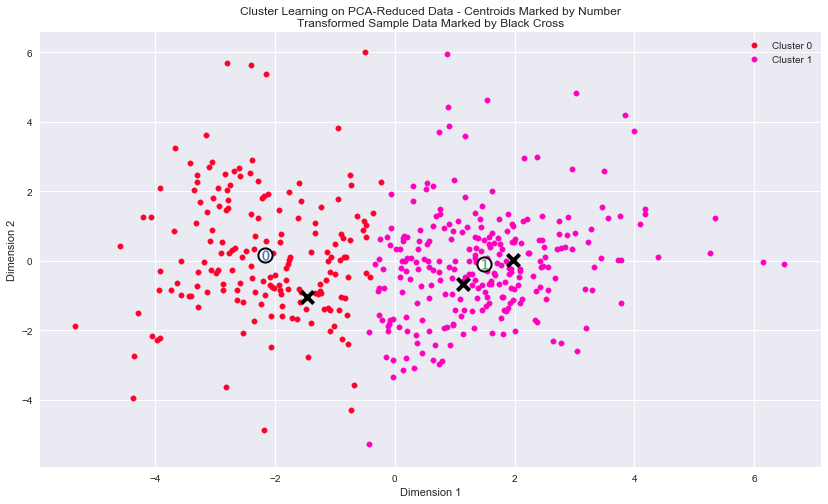

In [74]:
# Mostre os resultados do clustering da implementação
rs.cluster_results(reduced_data, preds, centers, pca_samples)

plt.savefig('Cluster.png', format='png', dpi=100)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [61]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

# Mostre os verdadeiros centros
segments = ['Segmento {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segmento 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segmento 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


### Questão 8
Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?*  
**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`.

**Resposta:**

Para responder essa questão, apresentarei algumas linhas de código para representar os dados calculados em relação à media e a mediana:

In [62]:
#Diferença entre os dados dos centros verdadeiros para a mediana
display(true_centers - data.median())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segmento 0,-4499.0,4273.0,7348.5,-574.0,3744.5,70.5
Segmento 1,363.0,-1730.0,-2278.5,562.0,-522.5,-284.5


In [63]:
#Diferença entre os dados dos centros verdadeiros para a média
display(true_centers - data.mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segmento 0,-7995.297727,2103.734091,4152.722727,-2119.931818,1679.506818,-488.870455
Segmento 1,-3133.297727,-3899.265909,-5474.277273,-983.931818,-2587.493182,-843.870455


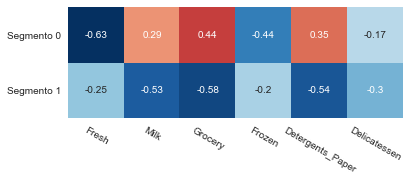

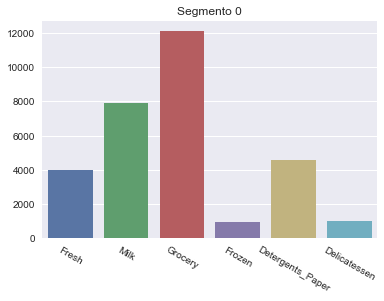

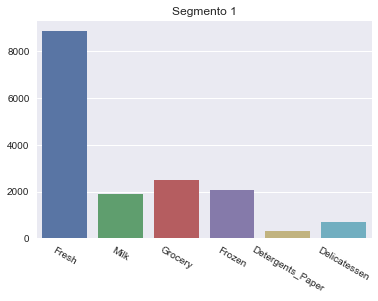

In [76]:
#Heatmap para os segmentos e os novos valores para entender a correlação entre eles

sns.heatmap((true_centers-data.mean())/data.std(ddof=0),
            square=True, annot=True, cbar=False)

plt.xticks(rotation=-30)
plt.yticks(rotation = 0)

plt.savefig('Questão 8-heatmap segmentos vs atributos.png', format='png', dpi=100)

plt.figure()
plt.axes().set_title("Segmento 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.xticks(rotation=-30)
plt.yticks(rotation = 0)

plt.savefig('Questão 8-Segmento 0.png', format='png', dpi=100)

plt.figure()
plt.axes().set_title("Segmento 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)

plt.xticks(rotation=-30)
plt.yticks(rotation = 0)

plt.savefig('Questão 8-Segmento 1.png', format='png', dpi=100)

Levando em consideração que a média é sensível à valores considerados *outliers*, a análise será feita em relação às distâncias da mediana.

**Segmento 0: ** Para o "segmento 0" percebe-se um consumo maior para os atributos *'Milk'*, *'Grocery'*, *'Detergent_Paper'* e levemente maior também para *'Delicatessen'*. Em contrapartida, esse segemento em relação à mediana, apresenta um consumo abaixo para *'Fresh'* e *'Frozen'* Esse perfil de consumo pode ser associado à um restaurante ou lanchonete.

**Segmento 1: ** Já para esse segmento, vemos um consumo maior para *'Fresh'* e *'Frozen'*. Esse perfil de consumo pode ser associado o locais de comercio de carnes congeladas ou laticínios ou mesmo um restaurante especializado em carnes.

### Questão 9
*Para cada amostra de ponto, qual segmento de cliente da* ***Questão 8*** *é melhor representado? As previsões para cada amostra de ponto são consistentes com isso?*

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [64]:
# Mostre as previsões
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
#Printa samples para análise
samples

#Diferença entre os samples e a mediana
display(samples - data.median())

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-2235.0,-2532.0,-2775.5,2334.0,-207.5,1196.5
1,8559.0,1220.0,4297.5,-495.0,2598.5,818.5
2,-3463.0,-2512.0,-1899.5,5970.0,-560.5,-590.5


**Resposta:**

As previsões são consistentes. Podemos observar que os *samples* 0 e 2 apresentam o consumo do atributo *'Frozen'* acima da mediana dos dados, evidenciando um local de venda de produtos congelados como uma peixaria ou loja de frutos do mar em geral.

Já para o *sample* 1, o mesmo apresenta todos os atributos exceto *'Frozen'* acima da mediana. Evidenciando assim um local como restaurante ou lanchonete, ou mesmo um conjugado de supermercado com uma lanchonete disponível aos clientes.

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente. *Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?*  
**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:**

Para utilizar a entrega 3 dias por semana, eu indicaria o segmento 1 por agregar os atributos ou alimentos *'Fresh'* e *'Frozen'*. Esses alimentos devem ter um rotatividade maior no estoque e pode-se pensar que uma entrega mais frequente na semana pode representar uma satisfação maior do cliente. Já o segmento 0 apresentar os atributos *'Milk'*, *'Grocery'*, *'Detergent_Paper'* e *'Delicatessen'* que pode representar um grande supermercado ou mesmo um pequeno mercado local de bairro. Nesse caso, a entrega de 3 dias por semana poderia ajudar caso fosse um grande comercio, mas talvez não seria tão útil para um mercado local.

Para utilizarmos o teste A/B no segmento 0, podemos separar por tamanho de cliente (size_A e size_B) e comparar os resultados. Como se trata de supermercados ou pequenos mercados locais, ao final de, por exemplo, 4 semanas teremos um boa amostra de satisfação de cada cliente e assim podemos iterar o teste. (O tamanho do cliente pode ser considerado pelo volume de compras ou caso tenhamos a informação pode-se separar pelo fator "marca" do cliente).

Já no segmento 1, o conjunto de testes pode ser escolhido pelo volume de compras de cada cliente e, assim, entender como é a resposta desses diferentes perfis de consumo em relação aos dias de entrega de mercadorias.

Utilizando então essas duas premissas para cada segmento, entendo que para o segmento 0 a hipótese que podemos testar é se o tamanho do cliente ou mesmo o nome da marca pode ou não influenciar na resposta aos dias entre entregas de mercadorias. Ao pensarmos nos clientes do segmento 1, a hipótese a ser testada é de que o volume de compras, por ser alimentos fescos e congelados, pode gerar uma resposta assertiva para o modelo.

Sendo assim, o teste A/B se faz importante para termos uma assertividade maior e melhor. Aplicar as opções de entrega a pequenos grupos dentro de cada segmento e medir o índice de satisfação desses clientes pode ser uma abordagem melhor para o caso. Com isso, testar as hipóteses e iterar o teste novamente com novas premissas pode gerar resultados satisfatórios para a distribuidora.

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
*Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de* ***segmentação de clientes*** *  
**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:**

Podemos utilizar uma técnica *semisupervisionada* para fazer essa nova classificação de clientes.

Primeiramente, podemos utilizar uma técnica de aprendizado não supervisionado como **K-Means** ou **Modelo de Mistura Gaussiano (GMM)** para classificar os clientes e determinar qual segmento eles pertecem. Com isso, gerariamos uma nova variável que será importante em nosso algoritmo de aprendizado supervisionado. Ao criar essa nova variável, podemos pensar nela como sendo *boolean*, sendo **0** para o segmento a qual ele não pertence e **1** para o segmento que o cliente pertece.

A partir dessa classificação em segmentos e atributo booleano, podemos usar um método de aprendizagem supervisionada, por exemplo *SVM* ou *KNN* com a nova variável de segmento de clientes como *'Target'*. Os novos clientes então poderão ter o segmento previsto pelo algorítmo.

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

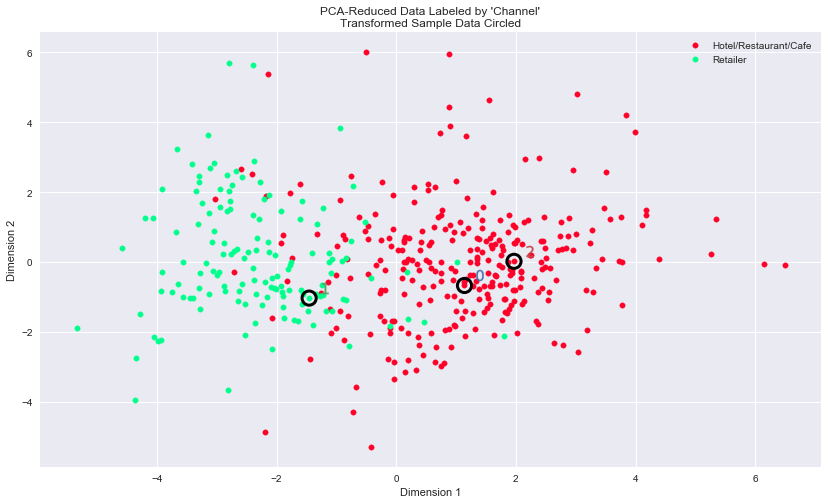

In [77]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
rs.channel_results(reduced_data, outliers, pca_samples)

plt.savefig('Dados rotulados', format='png', dpi=100)

### Questão 12
*Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista? Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição? Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:**

O algoritmo de clustering e o número de cluster escolhidos refletem a distribuição de *'Hotel/Restaurante/Café'*. Podemos observar que alguns pontos de clientes varejistas estão misturados com os pontos de hotéis, restaurantes e cafés, mas em linhas gerais a classificação apresentou uma correlação boa para os dados apresentados.

Podemos observar que para o *1ª Componente Principal* os dados estão indicando clientes puramente varejistas e pode ser evidenciado pela figura *'scatterplot dos dados e atributos'*. Já ao observarmos a *3ª Componente Principal* é possível identificar que os dados convergem para um mix entre os dois segmentos. Além dessa análise acerca das componentes principais, podemos dizer que o segmento 1 é puramente classificado como *'Hotel/Restaurante/Café'* e, no caso do segemento 0 tendemos a ter a mesma percepção para clientes varejistas. Contudo, há alguma interseção dos dados dos dois grupos e pode haver algum erro na classificação. Mesmo assim, as classificações feitas para os clientes através dos dois segmentos está bem consistente e representa bem os dados.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.